# 💡  **Overview**
    
In this notebook two association rules are implemented and compared.

1. **Apriori :** This generates association rules using frequent data sets.
2. **FP Growth :** An improved version of the Apriori Algorithm using FP Tree.

## 👉Libraries

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tabulate
import time
import plotly.express as px
import networkx as nx
from wordcloud import WordCloud,STOPWORDS

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


🗨️ Notes:

## 👉Load the data

In [36]:
data=pd.read_csv('https://raw.githubusercontent.com/PeroumalPajany/tmp/main/Groceries_dataset.csv')
display(data)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## 👉Preprocessing



### 📍 Validate Data

In [37]:
data.shape
data.info()
data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


,Member_number,Date,itemDescription
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
38760,False,False,False
38761,False,False,False
38762,False,False,False
38763,False,False,False


### 📍 Convert Data

In [38]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y' )
data.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [39]:
duplicates = data.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool


In [40]:
data = data.rename(columns = {'itemDescription':'Item'})
data.head()

,Member_number,Date,Item
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


## 👉Visualize Data

In [41]:
data['day'] = data['Date'].dt.day_name()
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.head(1)

,Member_number,Date,Item,day,month,year
0,1808,2015-07-21,tropical fruit,Tuesday,7,2015


In [42]:
data.describe()

,Member_number,Date,month,year
count,38765.000000,38765,38765.000000,38765.000000
mean,3003.641868,2015-01-09 18:17:12.498387712,6.487605,2014.528518
min,1000.000000,2014-01-01 00:00:00,1.000000,2014.000000
25%,2002.000000,2014-07-12 00:00:00,4.000000,2014.000000
50%,3005.000000,2015-01-21 00:00:00,6.000000,2015.000000
75%,4007.000000,2015-07-10 00:00:00,9.000000,2015.000000
max,5000.000000,2015-12-30 00:00:00,12.000000,2015.000000
std,1153.611031,NaN,3.419042,0.499193


In [43]:
transactions = data.groupby('Member_number')['Item'].apply(list).reset_index()
transactions

,Member_number,Item
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."
...,...,...
3893,4996,"[dessert, salty snack, rolls/buns, misc. bever..."
3894,4997,"[tropical fruit, white wine, whole milk, curd,..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[bottled water, butter milk, tropical fruit, b..."


In [44]:

item_count = data['Item'].value_counts()
display(item_count)

Item
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

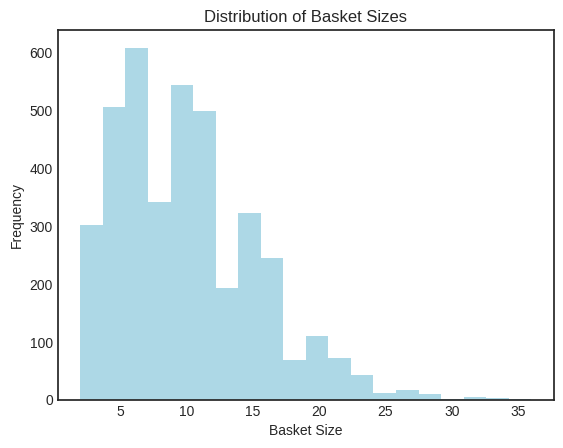

In [45]:
basket_sizes = data.groupby('Member_number')['Item'].count()
plt.hist(basket_sizes, bins=20, color='lightblue')
plt.xlabel('Basket Size')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Sizes')
plt.show()

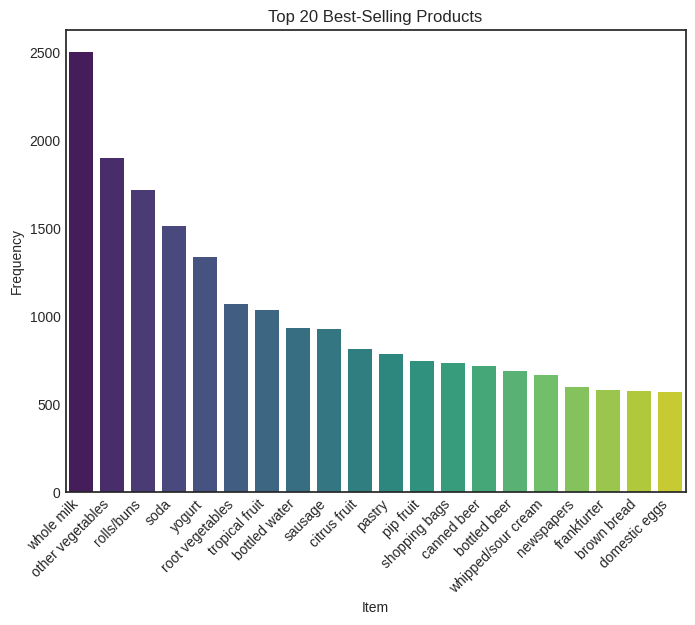

In [46]:
item_counts = data['Item'].value_counts().reset_index()
item_counts.columns = ['item', 'frequency']
item_counts = item_counts.sort_values(by='frequency', ascending=False)
top_n_items = item_counts.head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x='item', y='frequency', data=top_n_items, palette='viridis')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title(f'Top {len(top_n_items)} Best-Selling Products')
plt.xticks(rotation=45, ha='right')

plt.show()

In [47]:
frequency_of_items = data.groupby(pd.Grouper(key = 'Item')).size().reset_index(name = 'count')
fig = px.treemap(frequency_of_items, path = ['Item'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Items Sold',
    title_x = 0.5, title_font = dict(size = 12),
    height = 800
)
fig.update_traces(textinfo = "label+value")
fig.show()

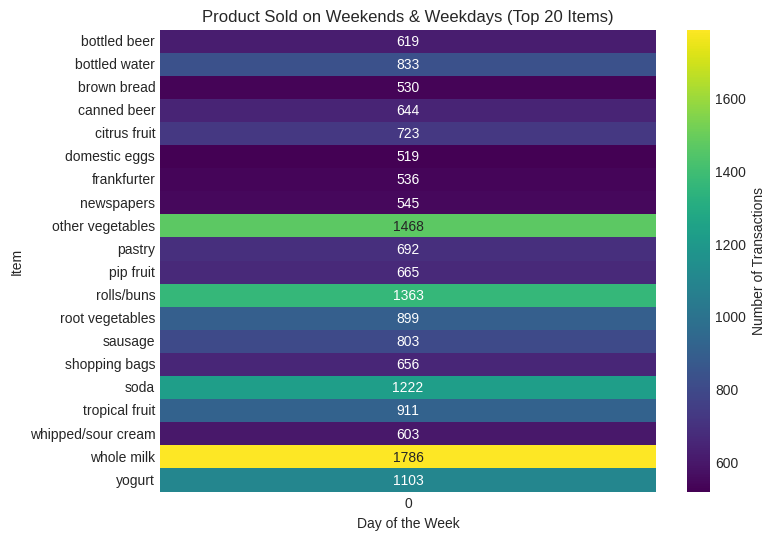

In [48]:
data['weekend'] = data['day'].isin([5, 6]).astype(int)
product_popularity = data.groupby(['Item', 'weekend'])['Member_number'].nunique().reset_index()
product_popularity.columns = ['Item', 'weekend', 'num_transactions']

top_N_items = product_popularity.groupby('Item')['num_transactions'].sum().nlargest(20).index
filtered_product_popularity = product_popularity[product_popularity['Item'].isin(top_N_items)]
product_popularity_pivot = filtered_product_popularity.pivot(index='Item', columns='weekend', values='num_transactions').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(product_popularity_pivot, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Transactions'})
plt.xlabel('Day of the Week')
plt.ylabel('Item')
plt.title('Product Sold on Weekends & Weekdays (Top 20 Items)')
plt.show()

In [49]:
data.head()

,Member_number,Date,Item,day,month,year,weekend
0,1808,2015-07-21,tropical fruit,Tuesday,7,2015,0
1,2552,2015-01-05,whole milk,Monday,1,2015,0
2,2300,2015-09-19,pip fruit,Saturday,9,2015,0
3,1187,2015-12-12,other vegetables,Saturday,12,2015,0
4,3037,2015-02-01,whole milk,Sunday,2,2015,0


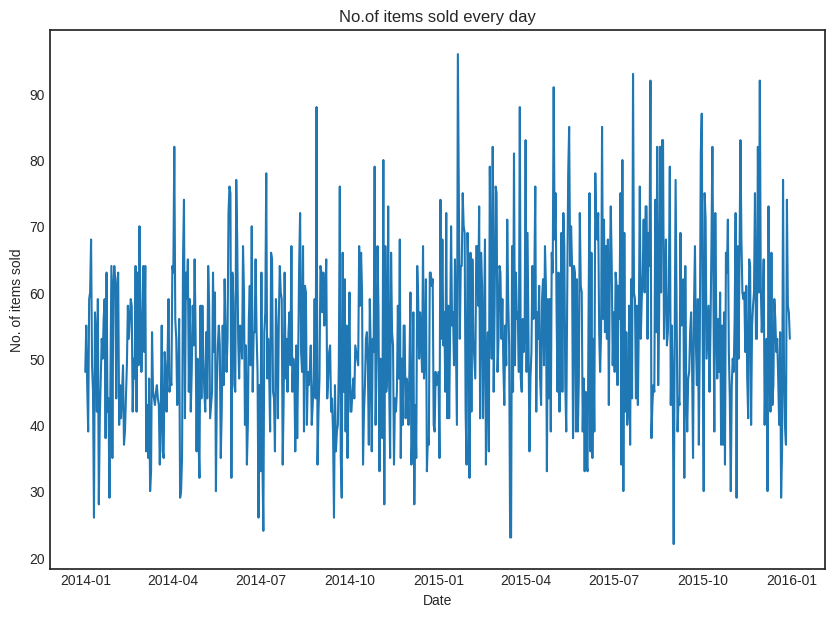

In [50]:
plt.figure(figsize=(10,7))
df3 = data.groupby('Date').count()['Item'].reset_index()
plt.plot(df3['Date'],df3['Item'])
plt.xlabel('Date')
plt.ylabel('No. of items sold')
plt.title('No.of items sold every day')
plt.show()

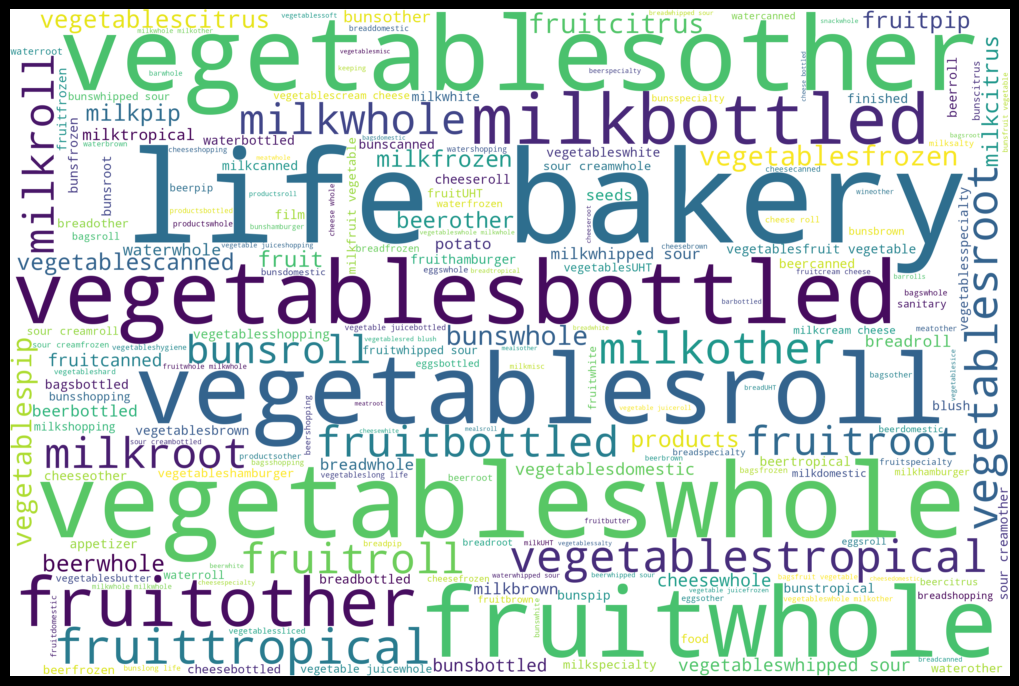

In [51]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate("".join(data['Item']))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')

#Display plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 👉Encoding

In [52]:
transactions['Item'] = transactions['Item'].astype(str)
#basket = transactions.groupby('Member_number')['Item'].apply(lambda x: ','.join(x)).str.get_dummies(',')
#basket = basket.astype(bool).astype(int)

basket = (data.groupby(['Member_number','Item'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))
basket = basket.astype(bool).astype(int)


In [53]:
basket.head()

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 👉Association Mining

**Support:** is the fraction of the transactionm records that contains record set. Support(I) = (The number of transactions containing I /  total number of transactions).

**Confidence:** Gauges how frequently an items in Y appear in transactions that contain X. Confidence (X→Y) = (Total number of transactions containing X & Y /  Number of transactions X).

**Lift** indicated if the probability of an event B increases or decreases given event A. Lift(A→B) = Confidence(A→B) / Support(B)


* . >1= A & B appear togather more often than expected (+ve relationship)
* . <1= A & B appear togather less often than expected (-ve relationship)  
* . =1= A & B appear together as frequently as expected if they were independent (no association though!)

For an association rule of the form 𝐴→𝐵, A is antecedent and B is consequent

**Zhang Metrics**
*  1=+ve association
* -1=-ve association
*  0=no assoociation


### 📍 Apriori

In [54]:
min_support = 0.05
import time
st = time.time()
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
apriori_time = time.time() - st

min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
len(rules)

30

In [55]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
2,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
3,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
4,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
5,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
6,(curd),(whole milk),0.120831,0.458184,0.063622,0.526539,1.149188,0.008259,1.144374,0.147663
7,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
8,(frozen vegetables),(whole milk),0.102617,0.458184,0.055156,0.537500,1.173110,0.008139,1.171495,0.164439
9,(margarine),(whole milk),0.116983,0.458184,0.059518,0.508772,1.110410,0.005918,1.102983,0.112605


### 📍 FP-Growth

In [56]:
min_support = 0.05
import time
st = time.time()
frequent_itemsets_fp = fpgrowth(basket, min_support=min_support, use_colnames=True)
fpgrowth_time = time.time() - st

min_confidence = 0.5
rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=min_confidence)
len(rules_fp)

30

In [57]:
display(rules_fp)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(soda, rolls/buns)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,0.010269,1.187926,0.179041
1,"(other vegetables, soda)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,0.012375,1.225416,0.203992
2,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
3,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537,0.198033
4,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507,0.264348
5,"(yogurt, rolls/buns)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,0.014917,1.328521,0.254605
6,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
7,"(other vegetables, sausage)",(whole milk),0.092868,0.458184,0.050282,0.541436,1.181702,0.007732,1.181551,0.169504
8,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572,0.129931
9,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299


## 👉 Visualize Metrics

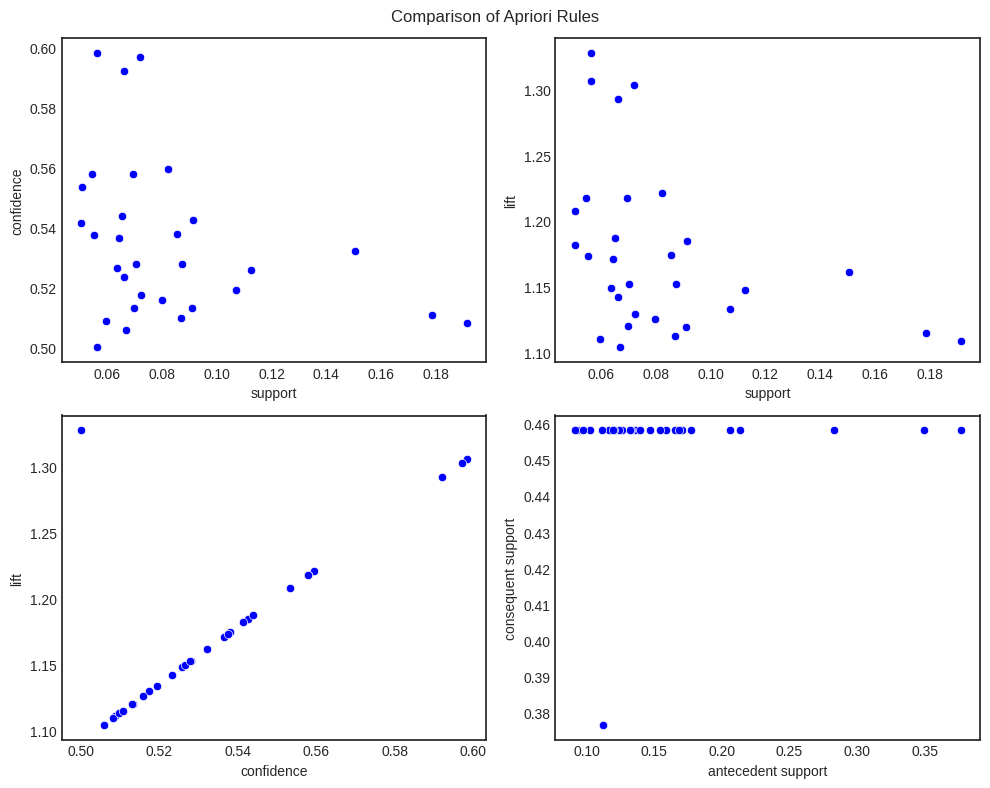

In [58]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-white')
plt.suptitle('Comparison of Apriori Rules')

plt.subplot(221)
sns.scatterplot(x="support", y="confidence", color='blue', data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift", color='blue', data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift", color='blue', data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support", color='blue', data=rules)

plt.tight_layout()
plt.show()

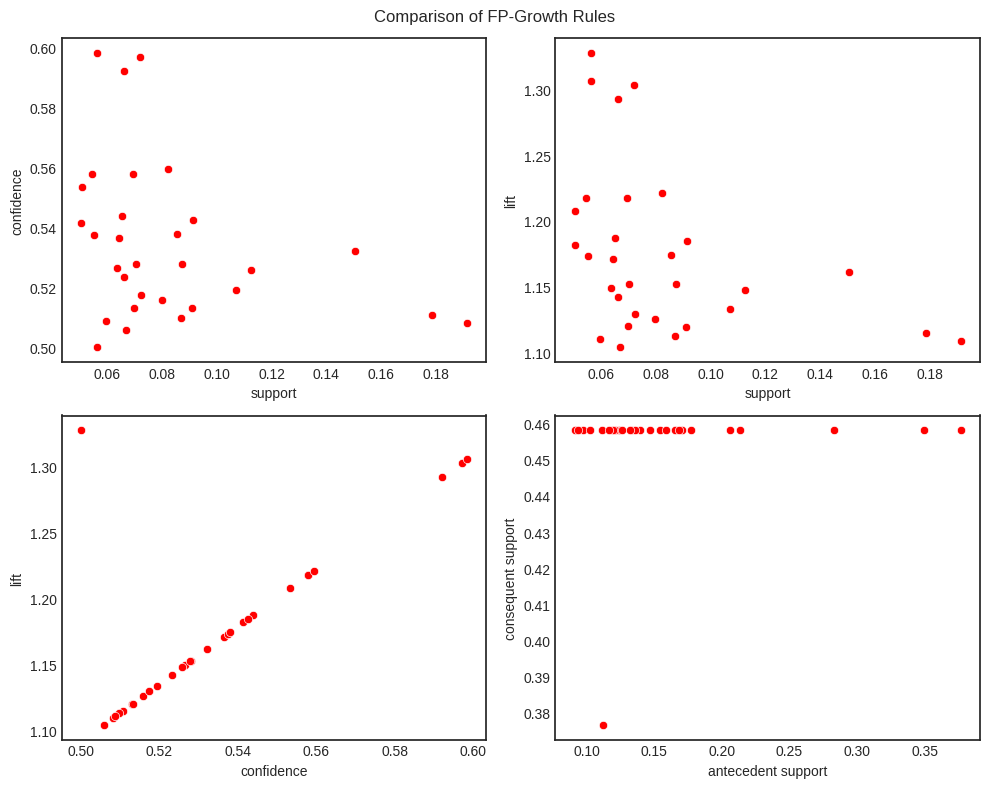

In [59]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-white')
plt.suptitle('Comparison of FP-Growth Rules')

plt.subplot(221)
sns.scatterplot(x="support", y="confidence", color='red', data=rules_fp)
plt.subplot(222)
sns.scatterplot(x="support", y="lift", color='red', data=rules_fp)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift", color='red', data=rules_fp)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support", color='red', data=rules_fp)

plt.tight_layout()
plt.show()

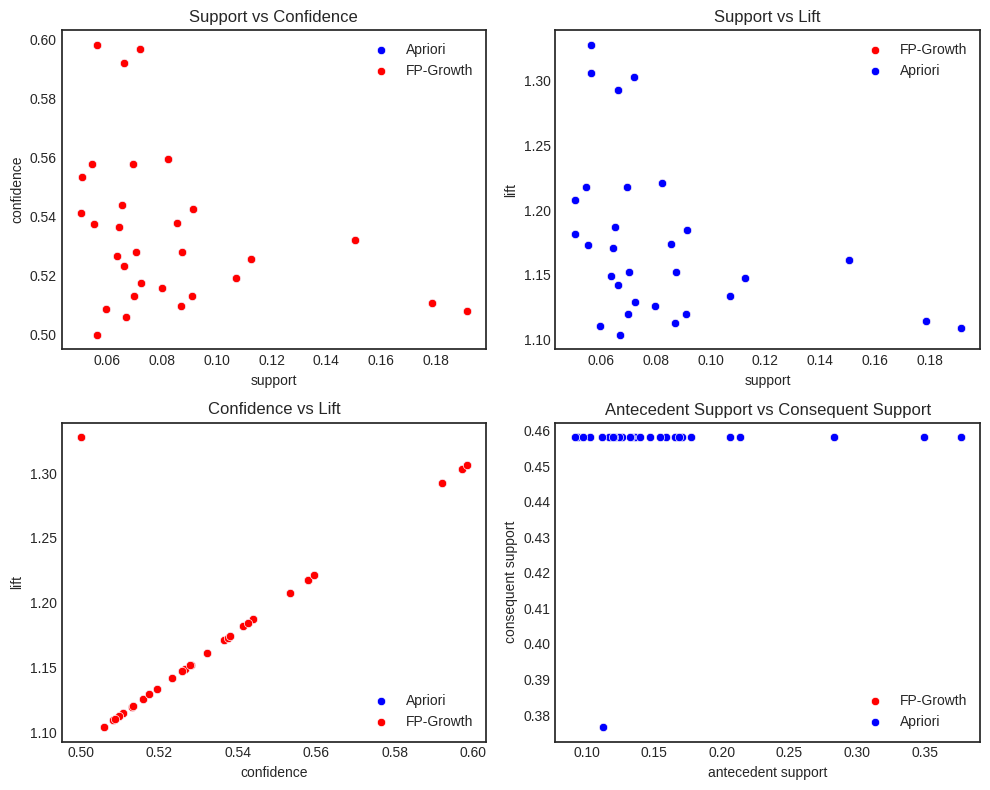

In [60]:

plt.figure(figsize=(10, 8))
plt.style.use('seaborn-white')
colors = {'Apriori': 'blue', 'FP-Growth': 'red'}

plt.subplot(221)
sns.scatterplot(x="support", y="confidence", data=rules, color=colors['Apriori'], label='Apriori')
sns.scatterplot(x="support", y="confidence", data=rules_fp, color=colors['FP-Growth'], label='FP-Growth')
plt.title('Support vs Confidence')
plt.legend()

plt.subplot(222)
sns.scatterplot(x="support", y="lift", data=rules_fp, color=colors['FP-Growth'], label='FP-Growth')
sns.scatterplot(x="support", y="lift", data=rules, color=colors['Apriori'], label='Apriori')
plt.title('Support vs Lift')
plt.legend()

plt.subplot(223)
sns.scatterplot(x="confidence", y="lift", data=rules, color=colors['Apriori'], label='Apriori')
sns.scatterplot(x="confidence", y="lift", data=rules_fp, color=colors['FP-Growth'], label='FP-Growth')
plt.title('Confidence vs Lift')
plt.legend()

plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support", data=rules_fp, color=colors['FP-Growth'], label='FP-Growth')
sns.scatterplot(x="antecedent support", y="consequent support", data=rules, color=colors['Apriori'], label='Apriori')
plt.title('Antecedent Support vs Consequent Support')
plt.legend()

plt.tight_layout()
plt.show()


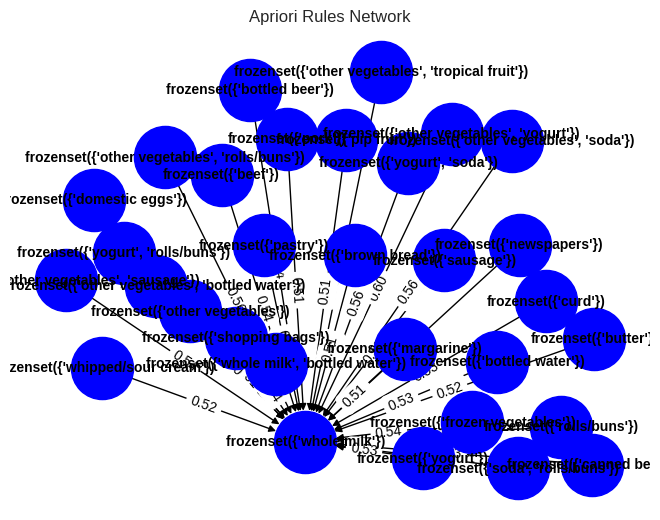

In [61]:

G = nx.DiGraph()

for _, rule in rules.iterrows():
    G.add_edge(str(rule['antecedents']), str(rule['consequents']), weight=rule['confidence'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='blue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})

plt.title('Apriori Rules Network')
plt.show()

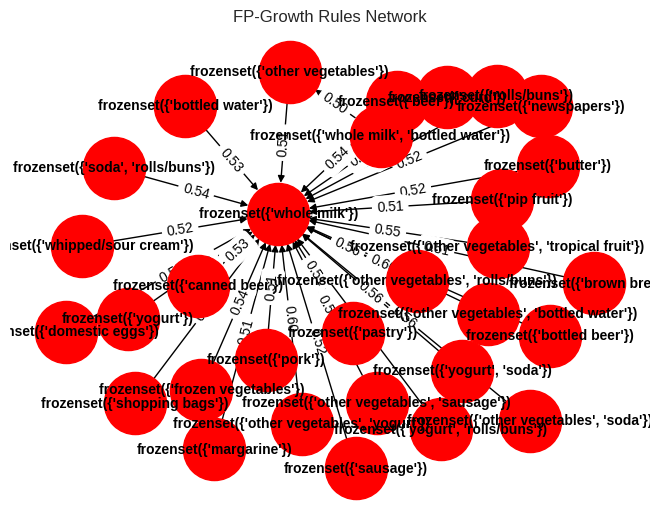

In [62]:
G = nx.DiGraph()

for _, rule in rules_fp.iterrows():
    G.add_edge(str(rule['antecedents']), str(rule['consequents']), weight=rule['confidence'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='red', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})

plt.title('FP-Growth Rules Network')
plt.show()

### 📍 Performance Chart

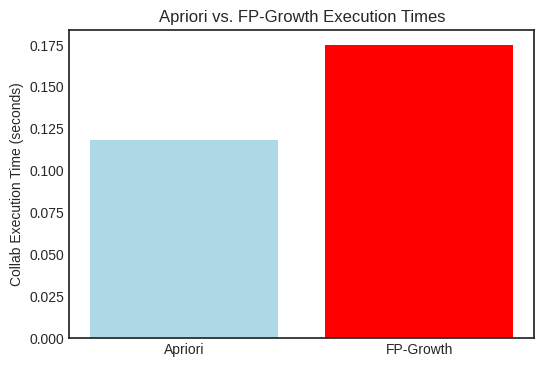

In [63]:
algorithms = ['Apriori', 'FP-Growth']
times = [apriori_time, fpgrowth_time]
plt.figure(figsize=(6, 4))
plt.bar(algorithms, times, color=['lightblue', 'red'])
plt.title('Apriori vs. FP-Growth Execution Times')
plt.ylabel('Collab Execution Time (seconds)')
plt.show()

In [64]:
import time
l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

def get_aprior_execs():
  ap_times = []
  for i in l:
      t1 = time.time()
      apriori(basket, min_support = i, use_colnames = True)
      ap_times.append((time.time() - t1) * 1000)
  return ap_times

def get_fpgrowth_execs():
  fp_times = []
  for i in l:
      t1 = time.time()
      fpgrowth(basket, min_support = i, use_colnames = True)
      fp_times.append((time.time() - t1) * 1000)
  return fp_times


time = pd.DataFrame({'Support Threshold': l, 'Apriori': get_aprior_execs(), 'FP-Growth': get_fpgrowth_execs()})
fig = px.line(time, x='Support Threshold', y=['Apriori', 'FP-Growth'], labels={'value': 'Run Time in ms'}, title='Apriori vs FP Growth Run Time')
fig.update_layout(xaxis_title='Min Support Threshold', yaxis_title='Run Time in ms', legend_title='Algorithm', width=800, height=500)
fig.show()

## 👉 Analysis

In [65]:
rules_sorted = rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.5) ].sort_values(by='lift', ascending=False).reset_index(drop=True)

rules_sorted['antecedents_s'] = rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted['consequents_s'] = rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

plt = px.parallel_categories(rules_sorted, dimensions=['antecedents_s', 'consequents_s'], color='lift')
plt.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 50%',
    title_x=0.5,
    font=dict(size=12), height=500, width=800
)

plt.show()

# 💡 Recommender

In [66]:
def freq_bought_items_recommender(item):

    item_df = basket.loc[basket[item]==1]
    frequent_itemsets = apriori(item_df, min_support=0.05, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    print('Items frequently bought together with {0}'.format(item))

    return rules['consequents'].unique()[:6]

In [67]:
freq_bought_items_recommender('whole milk')

Items frequently bought together with whole milk


array([frozenset({'whole milk'}), frozenset({'UHT-milk'}),
       frozenset({'beef'}), frozenset({'other vegetables'}),
       frozenset({'soda'}), frozenset({'yogurt'})], dtype=object)